In [31]:
import xarray as xr

In [32]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
import netCDF4

from scipy import stats

%matplotlib inline

print("numpy version  : ", np.__version__)
print("pandas version : ", pd.__version__)
print("xarray version : ", xr.__version__)

numpy version  :  1.16.4
pandas version :  0.24.2
xarray version :  0.12.1


In [33]:
sns.set_style('white')
sns.set_context('paper', font_scale=2)
sns.set_palette('hls', 6)
sns.set_style('ticks')

In [34]:
# produce float year as an np.array for use in linear regression later
core_year = np.array(list(range(1948,2008,1)))*1.0
print("core_year(start,finish,size) = ",core_year[0], core_year[59], len(core_year))

core_year(start,finish,size) =  1948.0 2007.0 60


In [44]:
dirname = "/work/a1r/smg/OWG/OM4_analysis"
fname_p25 = dirname+"/OM4p25_IAF_BLING_CFC_csf/umo/single_cycles/ocean_Drake_Passage.*.umo.nc"
fname_p5  = dirname+"/OM4p5_IAF_BLING_CFC_abio_csf_mle200/umo/single_cycles/ocean_Drake_Passage.*.umo.nc"
fname_p5n = dirname+"/OM4p5_IAF_BLING_CFC_abio_csf_p25config/umo/single_cycles/ocean_Drake_Passage.*.umo.nc"
fname_p5n
outdir = "/home/a1r/ipy/Notebooks/OM4-figures/"

In [36]:
# let xarray open up multiple files and merge them into a single time series
ds_p25 = xr.open_mfdataset(fname_p25)
ds_p5  = xr.open_mfdataset(fname_p5)
ds_p5n = xr.open_mfdataset(fname_p5n)

In [37]:
# get cell thicknesses 

#fname_vol = "/archive/oar.gfdl.bgrp-account/CMIP6/OMIP/warsaw_201803_mom6_2018.04.11/OM4p5_IAF_BLING_CFC_abio_csf_mle200/gfdl.ncrc4-intel16-prod/pp/ocean_annual_z/ts/annual/20yr/ocean_annual_z.1988-2007.volcello.nc"
fname_vol = "/work/a1r/smg/OWG/OM4_analysis/OM4p5_IAF_BLING_CFC_abio_csf_mle200/volcello/ocean_annual_z.1988-2007.volcello.nc"

#ds_vol = xr.open_dataset(fname_vol)
ds_vol = netCDF4.Dataset(fname_vol)

#print(ds_vol)
#dzip1 = ds_vol.z_i[1:]
#print(dzip1.values())

z_i = ds_vol.variables['z_i']
dz  = z_i[1:] - z_i[:-1]
print(dz.shape), print(dz)
dzinv = 1.0/dz
print(dz.shape), print(dz), print(dzinv)

(35,)
[  5.   10.   10.   15.   22.5  25.   25.   25.   37.5  50.   50.   75.
 100.  100.  100.  100.  100.  100.  100.  100.  100.  100.  100.  175.
 250.  375.  500.  500.  500.  500.  500.  500.  500.  500.  500. ]
(35,)
[  5.   10.   10.   15.   22.5  25.   25.   25.   37.5  50.   50.   75.
 100.  100.  100.  100.  100.  100.  100.  100.  100.  100.  100.  175.
 250.  375.  500.  500.  500.  500.  500.  500.  500.  500.  500. ]
[0.2 0.1 0.1 0.06666666666666667 0.044444444444444446 0.04 0.04 0.04
 0.02666666666666667 0.02 0.02 0.013333333333333334 0.01 0.01 0.01 0.01
 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.005714285714285714 0.004
 0.0026666666666666666 0.002 0.002 0.002 0.002 0.002 0.002 0.002 0.002
 0.002]


(None, None, None)

In [38]:
# extract umo and sum along y and z to produce Drake passage transport 

umo_p25   = ds_p25.umo
trans_p25 = umo_p25.sum('z_l').sum('yh_sub02')/1e9
Drake_p25_annual = trans_p25.groupby(trans_p25.time.dt.year).mean('time')
uo_p25    = umo_p25*dzinv

umo_p5   = ds_p5.umo
trans_p5 = umo_p5.sum('z_l').sum('yh_sub01')/1e9
Drake_p5_annual = trans_p5.groupby(trans_p5.time.dt.year).mean('time')
uo_p5     = umo_p5*dzinv

umo_p5n   = ds_p5n.umo
trans_p5n = umo_p5n.sum('z_l').sum('yh_sub01')/1e9
Drake_p5n_annual = trans_p5n.groupby(trans_p5n.time.dt.year).mean('time')
uo_p5n    = umo_p5n*dzinv

print(uo_p25)

<xarray.DataArray 'umo' (time: 3600, z_l: 35, yh_sub02: 144, xq_sub01: 35)>
dask.array<shape=(3600, 35, 144, 35), dtype=float64, chunksize=(720, 35, 144, 35)>
Coordinates:
  * xq_sub01  (xq_sub01) float64 -70.01
  * yh_sub02  (yh_sub02) float64 0.0 0.0 0.0 0.0 ... -54.92 -54.78 -54.64 -54.49
  * z_l       (z_l) float64 2.5 10.0 20.0 32.5 ... 5e+03 5.5e+03 6e+03 6.5e+03
  * time      (time) object 1708-01-16 12:00:00 ... 2007-12-16 12:00:00


In [39]:
# time mean over years 1988-2007 
umo_p25_annual = umo_p25.groupby(umo_p25.time.dt.year).mean('time')
umo_p5_annual  = umo_p5.groupby(umo_p5.time.dt.year).mean('time')
umo_p5n_annual = umo_p5n.groupby(umo_p5n.time.dt.year).mean('time')

umo_p25_1988_2007 = 1e-9*np.mean(umo_p25_annual[280:300,:,:,:],axis=0).squeeze('xq_sub01')
umo_p5_1988_2007 = 1e-9*np.mean(umo_p5_annual[280:300,:,:,:],axis=0).squeeze('xq_sub01')
umo_p5n_1988_2007 = 1e-9*np.mean(umo_p5n_annual[280:300,:,:,:],axis=0).squeeze('xq_sub01')

print(umo_p25_1988_2007[:,6:])


<xarray.DataArray 'umo' (z_l: 35, yh_sub02: 138)>
dask.array<shape=(35, 138), dtype=float32, chunksize=(35, 138)>
Coordinates:
    xq_sub01  float64 -70.01
  * yh_sub02  (yh_sub02) float64 -70.35 -70.25 -70.15 ... -54.78 -54.64 -54.49
  * z_l       (z_l) float64 2.5 10.0 20.0 32.5 ... 5e+03 5.5e+03 6e+03 6.5e+03


In [40]:
# time mean uo over years 1988-2007 

uo_p25_annual = uo_p25.groupby(uo_p25.time.dt.year).mean('time')
uo_p5_annual  = uo_p5.groupby(uo_p5.time.dt.year).mean('time')
uo_p5n_annual = uo_p5n.groupby(uo_p5n.time.dt.year).mean('time')

print(uo_p25_annual) 

#uo_p25_1988_2007 = np.mean(uo_p25_annual[280:300,:,:,:],axis=0).squeeze('xq_sub01')
#uo_p5_1988_2007  = np.mean(uo_p5_annual[280:300,:,:,:],axis=0).squeeze('xq_sub01')
#uo_p5n_1988_2007 = np.mean(uo_p5n_annual[280:300,:,:,:],axis=0).squeeze('xq_sub01')




<xarray.DataArray 'umo' (year: 300, z_l: 35, yh_sub02: 144, xq_sub01: 35)>
dask.array<shape=(300, 35, 144, 35), dtype=float64, chunksize=(1, 35, 144, 35)>
Coordinates:
  * xq_sub01  (xq_sub01) float64 -70.01
  * yh_sub02  (yh_sub02) float64 0.0 0.0 0.0 0.0 ... -54.92 -54.78 -54.64 -54.49
  * z_l       (z_l) float64 2.5 10.0 20.0 32.5 ... 5e+03 5.5e+03 6e+03 6.5e+03
  * year      (year) int64 1708 1709 1710 1711 1712 ... 2003 2004 2005 2006 2007


/mnt/data/anaconda3/envs/SO/lib/python3.6/site-packages/dask/array/numpy_compat.py:37: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/mnt/data/anaconda3/envs/SO/lib/python3.6/site-packages/dask/array/numpy_compat.py:37: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


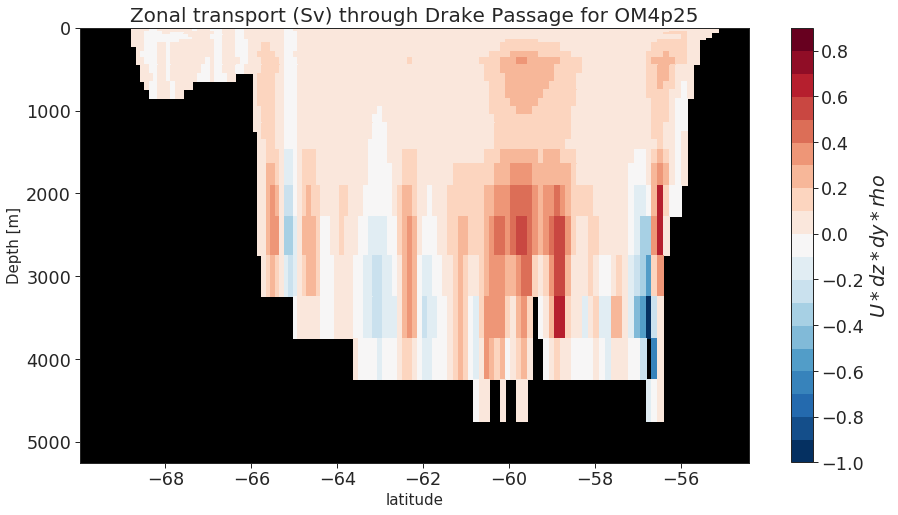

In [45]:
fig, axis = plt.subplots(1,1, figsize=(15,8))

# need to use 6: since poleward values have yh_sub02=0.0, which leads 
# to non-monotonic coordinates, which is a problem.  

levels_umo = np.arange(-1, 1, .1)
umo_p25_1988_2007.name = '$U*dz*dy*rho$'
umo_p25_1988_2007[:,6:].where(umo_p25_1988_2007[:,6:] != .1).sel(z_l=slice(0, 5000),yh_sub02=slice(-70,-54)).plot.pcolormesh(levels=levels_umo,extend='neither',cmap='RdBu_r', yincrease=False)
#umo_p25_1988_2007[:,:].where(umo_p25_1988_2007[:,:] != .1).sel(z_l=slice(0, 5000),yh_sub02=slice(-70,-54)).plot.pcolormesh(levels=levels_umo,extend='neither',cmap='RdBu_r', yincrease=False)

#umo_p25_1988_2007[:,6:].where(umo_p25_1988_2007[:,6:] != .1).plot.contour(yincrease=False, colors='black',levels=levels_umo)

axis.set_ylabel("Depth [m]",fontsize=15)
axis.set_xlabel("latitude",fontsize=15)
axis.set_facecolor('black')
axis.set_title("Zonal transport (Sv) through Drake Passage for OM4p25",fontsize=20)

fig.savefig(outdir+'/figures/umo_mean_Drake_OM4p25.png', bbox_inches='tight', dpi=300)

/mnt/data/anaconda3/envs/SO/lib/python3.6/site-packages/dask/array/numpy_compat.py:37: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/mnt/data/anaconda3/envs/SO/lib/python3.6/site-packages/dask/array/numpy_compat.py:37: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


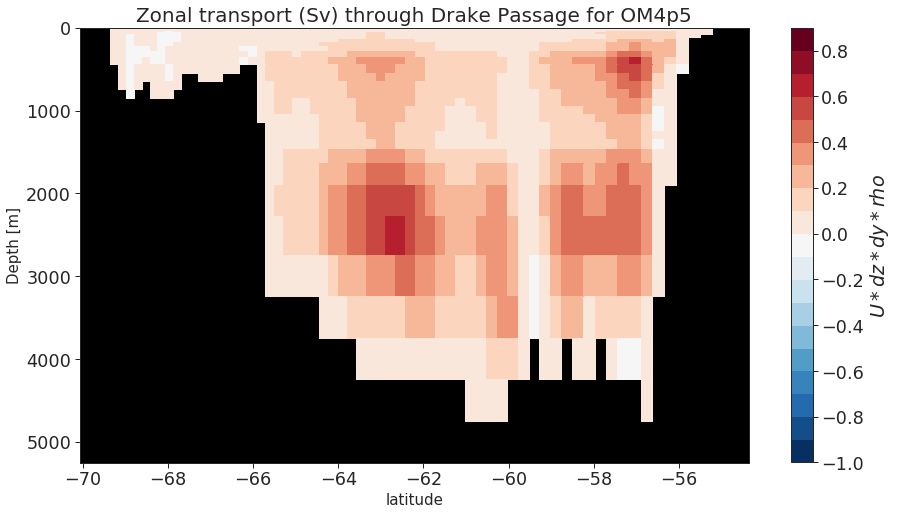

In [46]:
fig, axis = plt.subplots(1,1, figsize=(15,8))

levels_umo = np.arange(-1, 1, .1)
umo_p5_1988_2007.name = '$U*dz*dy*rho$'
umo_p5_1988_2007.where(umo_p5_1988_2007 != .1).sel(z_l=slice(0, 5000),yh_sub01=slice(-70,-54)).plot.pcolormesh(levels=levels_umo,extend='neither',cmap='RdBu_r', yincrease=False)

axis.set_ylabel("Depth [m]",fontsize=15)
axis.set_xlabel("latitude",fontsize=15)
axis.set_facecolor('black')
axis.set_title("Zonal transport (Sv) through Drake Passage for OM4p5",fontsize=20)

fig.savefig(outdir+'/figures/umo_mean_Drake_OM4p5.png', bbox_inches='tight', dpi=300)

/mnt/data/anaconda3/envs/SO/lib/python3.6/site-packages/dask/array/numpy_compat.py:37: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/mnt/data/anaconda3/envs/SO/lib/python3.6/site-packages/dask/array/numpy_compat.py:37: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


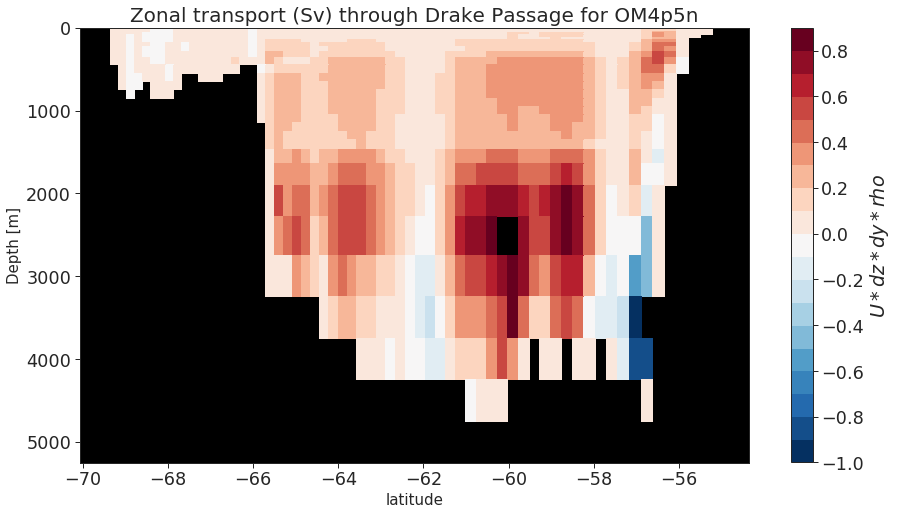

In [47]:
fig, axis = plt.subplots(1,1, figsize=(15,8))

levels_umo = np.arange(-1, 1, .1)
umo_p5n_1988_2007.name = '$U*dz*dy*rho$'
umo_p5n_1988_2007.where(umo_p5n_1988_2007 != .1).sel(z_l=slice(0, 5000),yh_sub01=slice(-70,-54)).plot.pcolormesh(levels=levels_umo,extend='neither',cmap='RdBu_r', yincrease=False)

axis.set_ylabel("Depth [m]",fontsize=15)
axis.set_xlabel("latitude",fontsize=15)
axis.set_facecolor('black')
axis.set_title("Zonal transport (Sv) through Drake Passage for OM4p5n",fontsize=20)

fig.savefig(outdir+'/figures/umo_mean_Drake_OM4p5n.png', bbox_inches='tight', dpi=300)


In [48]:
# extract mean and produce anomalies 
startyear = 180

#Drake_p25_mean = Drake_p25_annual[120:300].mean('year')
Drake_p25_mean = Drake_p25_annual[startyear:300].mean('year')

Drake_p25_1st  = Drake_p25_annual[0:60]     - Drake_p25_mean
Drake_p25_2nd  = Drake_p25_annual[60:120]   - Drake_p25_mean
Drake_p25_3rd  = Drake_p25_annual[120:180]  - Drake_p25_mean
Drake_p25_4th  = Drake_p25_annual[180:240]  - Drake_p25_mean
Drake_p25_5th  = Drake_p25_annual[240:300]  - Drake_p25_mean


Drake_p5_mean = Drake_p5_annual[startyear:300].mean('year')
Drake_p5_1st = Drake_p5_annual[0:60]     - Drake_p5_mean
Drake_p5_2nd = Drake_p5_annual[60:120]   - Drake_p5_mean
Drake_p5_3rd = Drake_p5_annual[120:180]  - Drake_p5_mean
Drake_p5_4th = Drake_p5_annual[180:240]  - Drake_p5_mean
Drake_p5_5th = Drake_p5_annual[240:300]  - Drake_p5_mean

Drake_p5n_mean = Drake_p5n_annual[startyear:300].mean('year')
Drake_p5n_1st = Drake_p5n_annual[0:60]     - Drake_p5n_mean
Drake_p5n_2nd = Drake_p5n_annual[60:120]   - Drake_p5n_mean
Drake_p5n_3rd = Drake_p5n_annual[120:180]  - Drake_p5n_mean
Drake_p5n_4th = Drake_p5n_annual[180:240]  - Drake_p5n_mean
Drake_p5n_5th = Drake_p5n_annual[240:300]  - Drake_p5n_mean


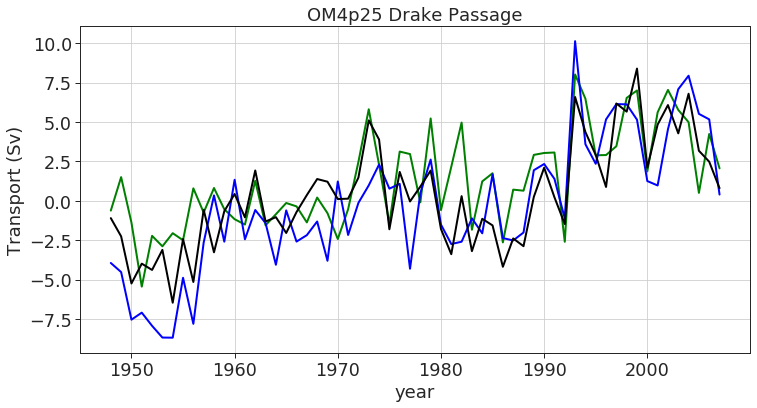

In [27]:
plt.figure(figsize=(12, 6))
plt.plot(core_year,Drake_p25_3rd,linewidth=2,color='green')
plt.plot(core_year,Drake_p25_4th,linewidth=2,color='blue')
plt.plot(core_year,Drake_p25_5th,linewidth=2,color='black')
#plt.plot(core_year,Drake_p25_ensm,linewidth=3,color='red')
plt.title(r'OM4p25 Drake Passage',fontsize=18)
plt.ylabel('Transport (Sv)',fontsize=18)
plt.xlabel('year',fontsize=18)
plt.grid()
plt.savefig('Drake_OM4p25.png', dpi = 300)

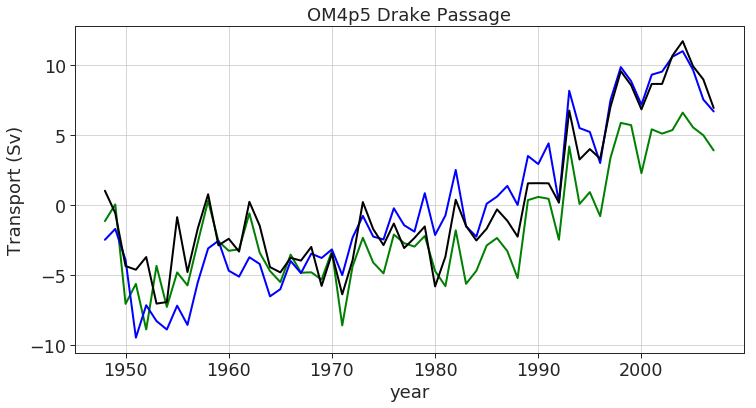

In [39]:
plt.figure(figsize=(12, 6))
plt.plot(core_year,Drake_p5_3rd,linewidth=2,color='green')
plt.plot(core_year,Drake_p5_4th,linewidth=2,color='blue')
plt.plot(core_year,Drake_p5_5th,linewidth=2,color='black')
#plt.plot(core_year,Drake_p25_ensm,linewidth=3,color='red')
plt.title(r'OM4p5 Drake Passage',fontsize=18)
plt.ylabel('Transport (Sv)',fontsize=18)
plt.xlabel('year',fontsize=18)
plt.grid()
plt.savefig('Drake_OM4p5.png', dpi = 300)

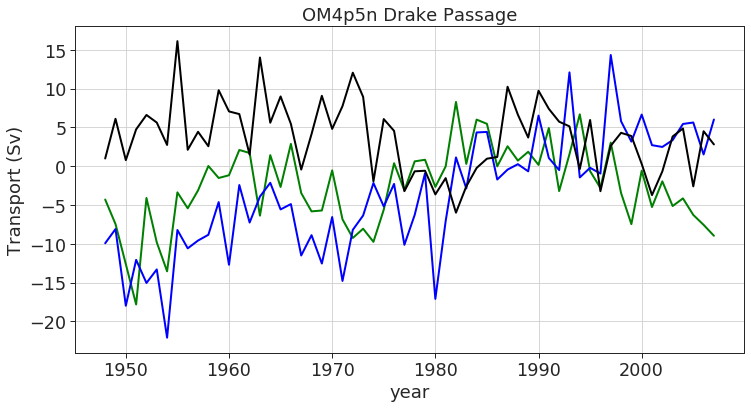

In [28]:
plt.figure(figsize=(12, 6))
plt.plot(core_year,Drake_p5n_3rd,linewidth=2,color='green')
plt.plot(core_year,Drake_p5n_4th,linewidth=2,color='blue')
plt.plot(core_year,Drake_p5n_5th,linewidth=2,color='black')
plt.title(r'OM4p5n Drake Passage',fontsize=18)
plt.ylabel('Transport (Sv)',fontsize=18)
plt.xlabel('year',fontsize=18)

plt.grid()

plt.savefig('Drake_OM4p5n.png', dpi = 300)

In [29]:
# linear regression fits for 4th and 5th cycle over years 1958-2007 for p25 and p5 

X = core_year
yrstart = 10    # to start at 1958

#Y_p5  = 0.5*( Drake_p5_4th[0:60].squeeze('xq_sub01').values  + Drake_p5_5th[0:60].squeeze('xq_sub01').values)
#Y_p25 = 0.5*( Drake_p25_4th[0:60].squeeze('xq_sub01').values + Drake_p25_5th[0:60].squeeze('xq_sub01').values)

Y_p5  = Drake_p5_5th[0:60].squeeze('xq_sub01').values
Y_p25 = Drake_p25_5th[0:60].squeeze('xq_sub01').values


slope_p5, intercept_p5, r_value_p5, p_value_p5, std_err=stats.linregress(X[yrstart:60],Y_p5[yrstart:60])
slope_p25,intercept_p25,r_value_p25,p_value_p25,std_err=stats.linregress(X[yrstart:60],Y_p25[yrstart:60])

p5_fit  = X * slope_p5  + intercept_p5
p25_fit = X * slope_p25 + intercept_p25

sp5 = format(slope_p5, '.3f')
ip5 = format(intercept_p5, '.3f')
rp5 = format(r_value_p5, '.3f')
pp5 = format(p_value_p5, '.5f')

sp25 = format(slope_p25, '.3f')
ip25 = format(intercept_p25, '.3f')
rp25 = format(r_value_p25, '.3f')
pp25 = format(p_value_p25, '.5f')

print("for OM4_p25: slope,intercept,r_value,p_value = ",sp25,ip25,rp25,pp25)
print("for OM4_p5:  slppe,intercept,r_value,p_value = ",sp5,ip5,rp5,pp5)

for OM4_p25: slope,intercept,r_value,p_value =  0.104 -206.005 0.505 0.00019
for OM4_p5:  slppe,intercept,r_value,p_value =  0.288 -569.353 0.827 0.00000


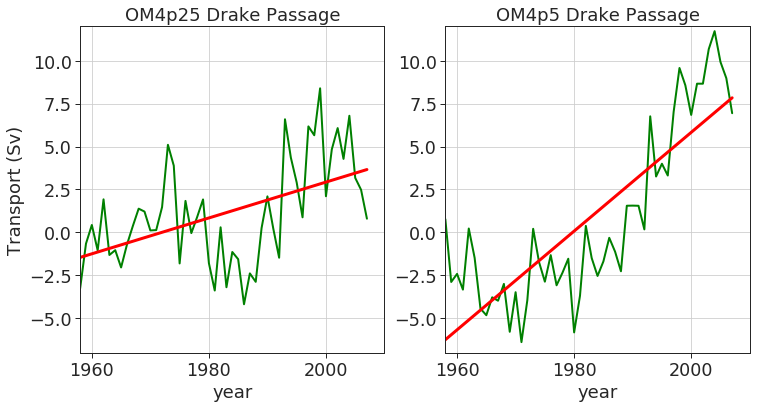

In [51]:
fig = plt.figure(figsize=(12, 6))

ymin=-7
ymax=12

plt.subplot(1, 2, 1)
#plt.plot(core_year,Drake_p25_4th,linewidth=1,color='black')
#plt.plot(core_year,Drake_p25_5th,linewidth=1,color='blue')
plt.plot(core_year,Y_p25,linewidth=2,color='green')
plt.plot(core_year,p25_fit,linewidth=3,color='red')

plt.title(r'OM4p25 Drake Passage',fontsize=18)
plt.ylabel('Transport (Sv)',fontsize=18)
plt.xlabel('year',fontsize=18)
plt.grid()
plt.ylim([ymin, ymax])
plt.xlim([1958,2010])


plt.subplot(1, 2, 2)
#plt.plot(core_year,Drake_p5_4th,linewidth=1,color='black')
#plt.plot(core_year,Drake_p5_5th,linewidth=1,color='blue')
plt.plot(core_year,Y_p5,linewidth=2,color='green')
plt.plot(core_year,p5_fit,linewidth=3,color='red')

plt.title(r'OM4p5 Drake Passage',fontsize=18)
plt.xlabel('year',fontsize=18)
plt.grid()
plt.ylim([ymin, ymax])
plt.xlim([1958,2010])
#plt.legend(['4th', '5th', 'mean', 'linear fit'])


plt.savefig('./figures/Drake_OM4p25_OM4p5.png', dpi = 300)



In [30]:
# now gather the wind stresses 

ds_p25_tau = xr.open_dataset(dirname+'OM4p25_IAF_BLING_CFC_csf/tauuo/tauuo_ann_p25.nc')
ds_p5n_tau = xr.open_dataset(dirname+'OM4p5_IAF_BLING_CFC_abio_csf_p25config/tauuo/tauuo_ann_p5none.nc')
ds_p5_tau  = xr.open_dataset(dirname+'OM4p5_IAF_BLING_CFC_abio_csf_mle200/tauuo/tauuo_ann_p5.nc')

ds_p25_tau = ds_p25_tau.rename({"TAUUO_ANN":"TAUUO_ANN_p25"})
ds_p5n_tau = ds_p5n_tau.rename({"TAUUO_ANN":"TAUUO_ANN_p5none"})
ds_p5_tau  = ds_p5_tau.rename({"TAUUO_ANN":"TAUUO_ANN_p5"})

ds_tau = xr.merge([ds_p5_tau, ds_p5n_tau, ds_p25_tau])
ds_tau = ds_tau.rename({'AX006':'time'})

ds_tau

tau_p25_max = ds_tau.TAUUO_ANN_p25.max('YH6_378')
tau_p5_max  = ds_tau.TAUUO_ANN_p5.max('YH1_180')

FileNotFoundError: [Errno 2] No such file or directory: b'/net/smg/OWG/analysis/OM4_analysis/OM4p25_IAF_BLING_CFC_csf/tauuo/tauuo_ann_p25.nc'

In [44]:
# linear regression fits for max wind stresses  

X = core_year
yrstart = 10    # to start at 1958

Y_tau_p5  = tau_p5_max
Y_tau_p25 = tau_p25_max

slope_tau_p5, intercept_tau_p5, r_value_tau_p5, p_value_tau_p5, std_err=stats.linregress(X[yrstart:60],Y_tau_p5[yrstart:60])
slope_tau_p25,intercept_tau_p25,r_value_tau_p25,p_value_tau_p25,std_err=stats.linregress(X[yrstart:60],Y_tau_p25[yrstart:60])

p5_tau_fit  = X * slope_tau_p5  + intercept_tau_p5
p25_tau_fit = X * slope_tau_p25 + intercept_tau_p25

tau_sp5 = format(slope_tau_p5, '.7f')
tau_ip5 = format(intercept_tau_p5, '.3f')
tau_rp5 = format(r_value_tau_p5, '.3f')
tau_pp5 = format(p_value_tau_p5, '.5f')

tau_sp25 = format(slope_tau_p25, '.7f')
tau_ip25 = format(intercept_tau_p25, '.3f')
tau_rp25 = format(r_value_tau_p25, '.3f')
tau_pp25 = format(p_value_tau_p25, '.5f')

print("for tau OM4_p25: slope,intercept,r_value,p_value = ",tau_sp25,tau_ip25,tau_rp25,tau_pp25)
print("for tau OM4_p5:  slope,intercept,r_value,p_value = ",tau_sp5,tau_ip5,tau_rp5,tau_pp5)



for tau OM4_p25: slope,intercept,r_value,p_value =  0.0008412 -1.528 0.744 0.00000
for tau OM4_p5:  slope,intercept,r_value,p_value =  0.0008373 -1.521 0.743 0.00000


(1958, 2007)

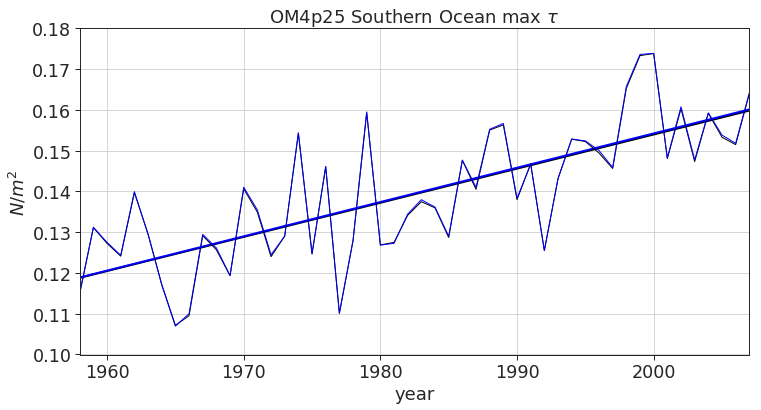

In [45]:
fig = plt.figure(figsize=(12, 6))

ymin = 0.1
ymax = 0.18

plt.subplot(1, 1, 1)

plt.plot(core_year,p5_tau_fit,linewidth=2,color='black')
plt.plot(core_year,p25_tau_fit,linewidth=2,color='blue')

plt.plot(core_year,tau_p5_max,linewidth=1,color='black')
plt.plot(core_year,tau_p25_max,linewidth=1,color='blue')


plt.title(r'OM4p25 Southern Ocean max $\tau$',fontsize=18)
plt.ylabel('$N/m^{2}$',fontsize=18)
plt.xlabel('year',fontsize=18)
plt.grid()
plt.ylim([ymin, ymax])
plt.xlim([1958,2007])
#plt.legend(['4th', '5th'])


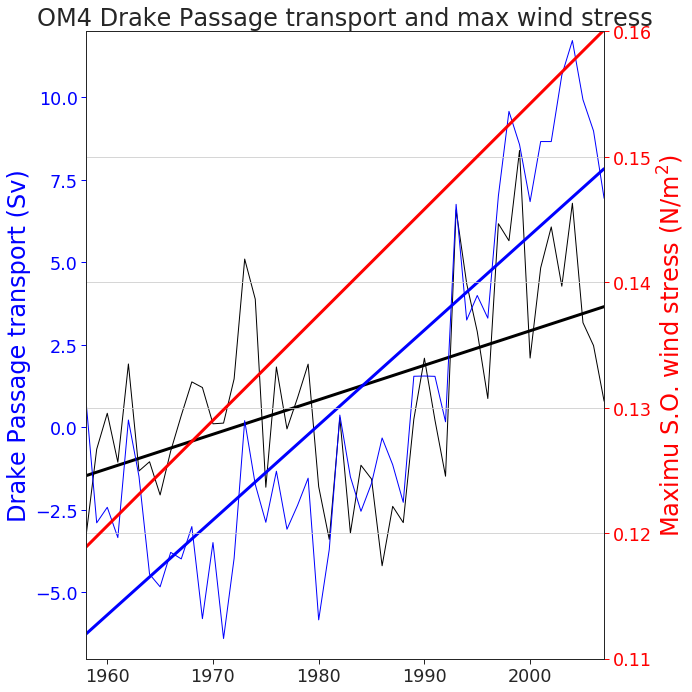

In [46]:
fig, ax1 = plt.subplots(ncols=1, nrows=1, figsize=(10,10))
ax2 = ax1.twinx()

ymin=-7
ymax=12


ax1.plot(core_year,p25_fit,linewidth=3,color='black')
ax1.plot(core_year,Y_p25,linewidth=1,color='black')

ax1.plot(core_year,p5_fit,linewidth=3,color='blue')
ax1.plot(core_year,Y_p5,linewidth=1,color='blue')

ax2.plot(core_year,p25_tau_fit,linewidth=3,color='red')
#ax2.plot(core_year,p5_tau_fit,linewidth=2,color='red')

#ax2.plot(core_year,tau_p5_max,linewidth=1,color='black')
#ax2.plot(core_year,tau_p25_max,linewidth=1,color='blue')

plt.title('OM4 Drake Passage transport and max wind stress',fontsize=24)
plt.xlabel('year',fontsize=18)
plt.grid()
plt.xlim([1958,2007])

ax1.set_ylim([-7, 12])
ax1.set_ylabel('Drake Passage transport (Sv)', color='blue',fontsize=24)
ax1.tick_params('y', colors='blue')

ax2.set_ylim([0.11,0.16])
ax2.set_ylabel('Maximu S.O. wind stress (N/m$^2$)', color='red',fontsize=24)
ax2.tick_params('y', colors='red')

fig.tight_layout()

plt.savefig('Drake_OM4_transport_and_winds.png', dpi = 300)